# Excercise: Design of a separation process in HYSYS

HYSYS and NeqSim

1. Set up and calculate separation and recompression process to meet the process specifications (cricondenbar) in the pipeline. 
2. Select separation equipment (horizontal, vertical, two/three phase)
3. Calculate the size and weight of the separation equipment

# 1. Setting up a Unisim/HYSYS simulation


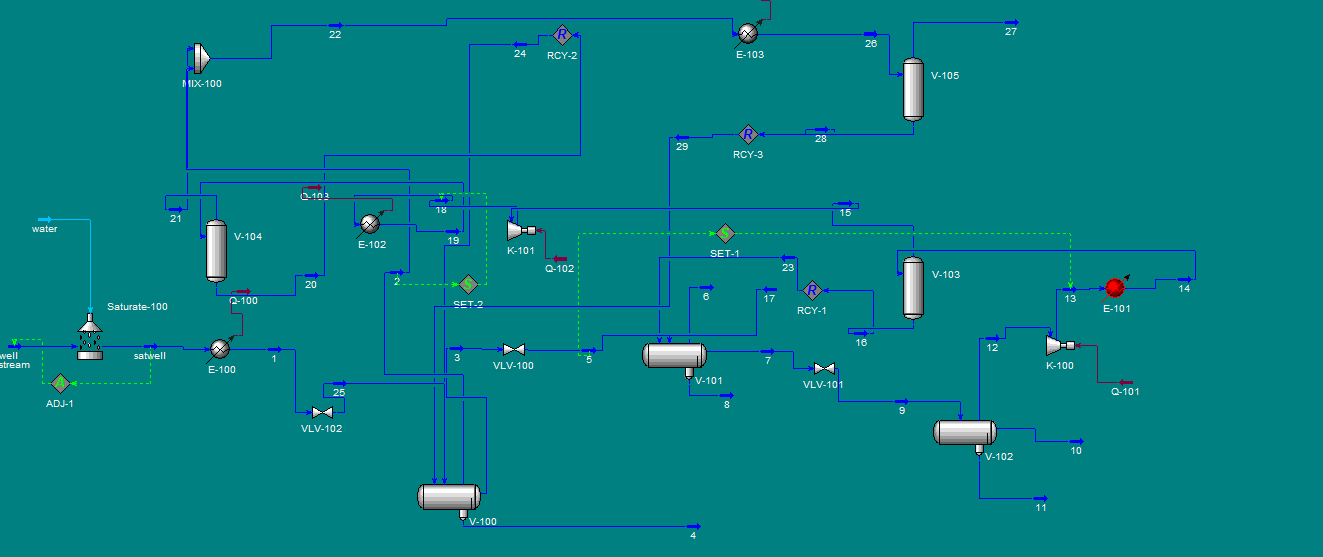

# 2. Select separation equipment (horizontal, vertical, two/three phase)

The inlet 3-phase separator will have th following operation conditions:

In [6]:
pressureSep = 90.0 #bara
temperatureSep = 48.8 #C

ActualGasFLowInletSep = 22546.2183321879 #Am3/hr
VolumeFLowWaterInletSep = 7.21475741103811 #m3/hr
VolumeFlowOilInletSep = 456.743943900369 # m3/hr

GLRInletSep = ActualGasFLowInletSep/(VolumeFLowWaterInletSep+VolumeFlowOilInletSep)

print("inlet separator:")
print("GLR ", GLRInletSep , " m3/m3")


ActualGasFLowDewScrub = 18006.1829389171 #Am3/hr
VolumeFLowLiquidDewScrub = 84.7938686445150 #m3/hr
GLRDewScrub = ActualGasFLowDewScrub/VolumeFLowLiquidDewScrub

liquidPrecentTOScrubber = VolumeFLowLiquidDewScrub/(ActualGasFLowDewScrub+VolumeFLowLiquidDewScrub)*100

print("dewpoint scrubber:")
print("GLR ", GLRDewScrub , " m3/m3")
print("volume% liquids ", liquidPrecentTOScrubber , " %")

inlet separator:
GLR  48.595313049328865  m3/m3
dewpoint scrubber:
GLR  212.35241682868838  m3/m3
volume% liquids  0.46870807224225225  %


For the inlet separator we will have a GLR less than 50 - we have tree phases and potential slug flow. We will select a horizontal separator for this applications.

For the scruber we have a GLR of 212. THere will be no slug flow. THe liquid vol% into the scrubber is <0.5%. We will typically select a vertical separator.  

# 3. Calculate the size and weight of the separation equipment

The general equation for sizing a separator or scrubber is given by the Sauder Brown equation:

$v=K_s\times\sqrt{(\rho_L-\rho_g)/\rho_g}$

Where $\rho_g$ is the gas density $\rho_l$ the liquid density and $K_s$ is the gas load factor. v is the maximum allowable velocty of the gas in the separator. In this excercise we will use a Ks value for horizontal separators of 0.2and a L/D retio of 5.0.

For vertical scrubbers we will use a Ks factor of 0.1 and a L/D ratio of 4.0.

The separator diameter is calculated from the equation

$D=\sqrt{4.0\cdot \frac{Q_g}{\pi \cdot v \cdot F_g}}$

Where $F_g$ is the fraction of area occupied by the gas (we will use 0.8 here).

$v=\frac{g\cdot {D_p}^2 (\rho_l - \rho_g)}{18 \cdot \mu_{oil} }$

The crosssectional area neccesary to degass the oil is calculated from

For oil-water separation we use the equation

$v=\frac{A \cdot C ((\rho_w - \rho_o)}{\mu} \cdot L_c$

where v is setling velocity, A is a coefficient 0.167, C is correction factor from diagram and Lc is length correction ($0.52L^{0.2}$).


In [7]:
#@title Calculation of size of inlet separator
import math  

Ks_horizontal = 0.152

rho_gas_inletsep=90.0
rho_liq_inletsep=670.0
rho_water_inletsep=1000.0

v_max_inletsep = Ks_horizontal*math.sqrt((rho_liq_inletsep-rho_gas_inletsep)/rho_gas_inletsep)

print("v_max ", v_max_inletsep, " [m/sec]")

Fg_inletsep = 0.8
area_inletSep = ActualGasFLowInletSep/3600.0/v_max_inletsep/Fg_inletsep
diameter_inletSep = inletSep = math.sqrt(area_inletSep/3.14*4)
print("Diameter of inletSep ", diameter_inletSep, " [m]")

L_D_ratio = 5.0

length_inletSep = diameter_inletSep*L_D_ratio
print("Length of inletSep ", length_inletSep, " [m]")

D_bub = 250e-6
oil_viscosity = 0.01 #kg/ms
v_bub_rising = 9.81 * D_bub*D_bub*(rho_liq_inletsep-rho_gas_inletsep)/18.0/oil_viscosity

A_cross = VolumeFlowOilInletSep/3600.0/v_bub_rising
print("Cross section area of gas-oil contact in inletSep ", A_cross, " [m^2]")

L_oil_gas = A_cross/diameter_inletSep
oilViscosity = 2.5e-3
print("Length gas-oil contact in inletSep ", L_oil_gas, " [m]")
C = 0.5e-6
v_oil_water = 0.167*C*(rho_water_inletsep-rho_liq_inletsep)/oilViscosity*0.52*math.pow(10.0, 0.2)

A_cross_oil_water = VolumeFlowOilInletSep/3600.0/v_oil_water
print("Cross section area of oil-water contact in inletSep ", A_cross_oil_water, " [m^2]")
L_oil_water = A_cross_oil_water /diameter_inletSep
print("Length oil-water contact in inletSep ", L_oil_water, " [m]")

v_max  0.38586583736377134  [m/sec]
Diameter of inletSep  5.083790168225269  [m]
Length of inletSep  25.418950841126346  [m]
Cross section area of gas-oil contact in inletSep  64.21933198360138  [m^2]
Length gas-oil contact in inletSep  12.632175966857439  [m]
Cross section area of oil-water contact in inletSep  13.96710977572764  [m^2]
Length oil-water contact in inletSep  2.7473812477597797  [m]


In [8]:
#@title Calculation of size of gas scrubber
import math  

Ks_vertical = 0.1

rho_gas_scrubber=90.0
rho_liq_scrubber=670.0

v_max_scrubber = Ks_vertical*math.sqrt((rho_liq_scrubber-rho_gas_scrubber)/rho_gas_scrubber)

print("v_max ", v_max_scrubber, " [m/sec]")

Fg_scrubber = 1.0
area_scrubber = ActualGasFLowDewScrub/3600.0/v_max_scrubber/Fg_scrubber
diameter_scrubber = math.sqrt(area_scrubber/3.14*4)
print("Diameter of scrubber ", diameter_scrubber, " [m]")

L_D_ratio = 5.0

length_scrubber = diameter_scrubber*L_D_ratio
print("Height of scrubber ", length_scrubber, " [m]")

designPressure = 20.0 #MPa
E = 1.0 #MPa
tensileStrength = 483 #MPa
corrAlow = 0.01

wall_thickness = designPressure*diameter_scrubber*1000.0/(2.0*1.0/3.5*tensileStrength*E-1.2*designPressure)+corrAlow
print("wall thicknesss " , wall_thickness, " mm")

Wb = 0.032*diameter_scrubber*1000.0*wall_thickness # kg/m

massOfCylSection = Wb*length_scrubber
print("weight of shell " , (massOfCylSection/1000.0), " tonns")

v_max  0.2538591035287969  [m/sec]
Diameter of scrubber  5.0098921795831926  [m]
Height of scrubber  25.049460897915964  [m]
wall thicknesss  397.62049044311055  mm
weight of shell  1596.781520526609  tonns
